In [20]:
%%capture
import pandas
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=[12, 8], dpi=120)
plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({"figure.figsize": (12, 8), "figure.dpi": 200})
fig1, ax1 = plt.subplots()
fig1.set_facecolor('white')

# ax1.xaxis.label.set_variant("I")
# ax1.xaxis.tick_top = "2"

此处先绘制一个裸电极和某条件下的电极曲线，后者也可以不绘制。同时，在绘图前读入所有相关数据。注意本方块最开始对图表进行清除（相当于重定义）

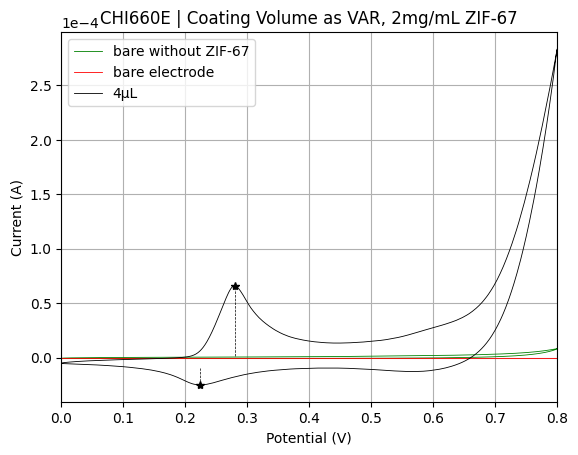

In [21]:
# %%capture
dataxy = None
ax1.clear()
ax1.grid()
ax1.xaxis.label.set_text(r"Potential (V)")
ax1.yaxis.label.set_text(r"Current (A)")
ax1.set_title("CHI660E | Coating Volume as VAR, 2mg/mL ZIF-67")
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

for chknum in range(3, 7 + 1): # 5-6
    file="CV-{}uL.txt".format(int(chknum))
    with open(file) as f:
        rawData = [strLines.split('\n')[0] for strLines in f.readlines()]
        realData = rawData[rawData.index("Potential/V, Current/A") + 2 :]
        realData = np.array([[float(j) for j in i.split(", ")] for i in realData])
        selectData = realData[np.argwhere(realData == 0)[-1][0] :].T # equal to x-y
        # selectData = realData[np.argwhere(realData == 0)[-2][0] : np.argwhere(realData == 0)[-1][0]].T # equal to x-y
        dataxy = np.append(dataxy, selectData, axis=0) if isinstance(dataxy, np.ndarray) else selectData

file="CV-{}uL.txt".format(int(6)) # 3-4
with open(file) as f:
    rawData = [strLines.split('\n')[0] for strLines in f.readlines()]
    realData = rawData[rawData.index("Potential/V, Current/A") + 2 :]
    realData = np.array([[float(j) for j in i.split(", ")] for i in realData])
    selectData = realData[np.argwhere(realData == 0)[-2][0] : np.argwhere(realData == 0)[-1][0]].T # equal to x-y
    dataxy[6] = selectData[0]
    dataxy[7] = selectData[1]

# bad data
# li3 = ax1.plot(dataxy[0], dataxy[1], 'b-', label="3μL", linewidth=.4)
# ax1.plot(0.27, 1.116e-4, 'b*') # 1.099e-4
# ax1.plot(0.213, -4.681e-5, 'b*') # 3.276e-5

with open("bare-group3.csv") as f:
    rawData = [strLines.split('\n')[0] for strLines in f.readlines()]
    realData = np.array([[float(j) for j in i.split(",")] for i in rawData])
    selectData = realData[np.argwhere(realData == 0)[-1][0] : ].T # equal to x-y

liBare = ax1.plot(selectData[0], 1e-6 * selectData[1], 'g-', label="bare without ZIF-67", linewidth=.6)
liBase = ax1.axhline(0, label="bare electrode", linewidth=.6, color='red')

li4 = ax1.plot(dataxy[2], dataxy[3], 'k-', label="4μL", linewidth=.6)
ax1.plot(0.28, 6.599e-5, 'k*') #6.498e-5
ax1.plot(0.224, -2.518e-5, 'k*') #-1.552e-5 = 8.05e-5
li4StarMax = ax1.vlines(0.28, ymin = 6.599e-5 - 6.498e-5, ymax = 6.599e-5, linewidth=.5, color='k', linestyle='--')
li4StarMin = ax1.vlines(0.224, ymin = -2.518e-5, ymax = -2.518e-5 + 1.552e-5, linewidth=.5, color='k', linestyle='--')

ax1.legend()
ax1.set_xlim([0, 0.8])
fig1

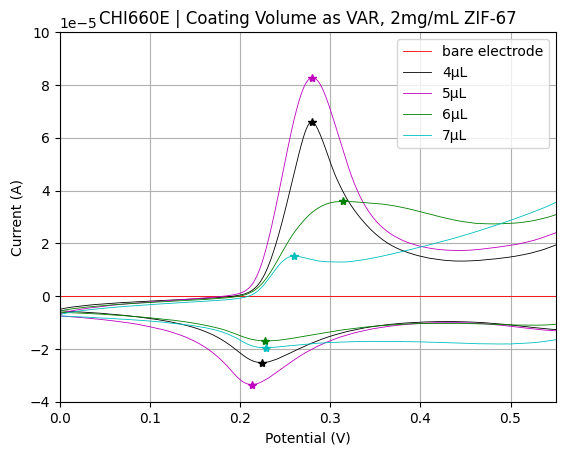

In [22]:
li4StarMax.set_visible(False)
li4StarMin.set_visible(False)
liBare.pop(0).remove()

dataPoint = np.array(
            [[[0.280, 6.599e-5, 6.498e-5], [0.224, -2.518e-5, -1.552e-5]],
             [[0.280, 8.271e-5, 8.057e-5], [0.213, -3.349e-5, -3.176e-5]], 
             [[0.314, 3.586e-5, 3.434e-5], [0.228, -1.696e-5, -6.662e-6]], 
             [[0.260, 1.524e-5, 1.530e-5], [0.229, -1.956e-5, -2.416e-6]]])

li5 = ax1.plot(dataxy[4], dataxy[5], 'm-', label="5μL", linewidth=.6)
ax1.plot(dataPoint[1][0][0], dataPoint[1][0][1], 'm*')
ax1.plot(dataPoint[1][1][0], dataPoint[1][1][1], 'm*')
li6 = ax1.plot(dataxy[6], dataxy[7], 'g-', label="6μL", linewidth=.6)
ax1.plot(dataPoint[2][0][0], dataPoint[2][0][1], 'g*')
ax1.plot(dataPoint[2][1][0], dataPoint[2][1][1], 'g*')
li7 = ax1.plot(dataxy[8], dataxy[9], 'c-', label="7μL", linewidth=.6)
ax1.plot(dataPoint[3][0][0], dataPoint[3][0][1], 'c*')
ax1.plot(dataPoint[3][1][0], dataPoint[3][1][1], 'c*')
# ax1.plot(0.28, 6.599e-5, 'c*') #6.498e55
# ax1.plot(0.224, -2.518e-5, 'c*') #-1.552e-5

ax1.legend()#handles=[li3[0], li4[0], li5[0], li6[0], li7[0]])
ax1.set_xlim([0, 0.55])
ax1.set_ylim([-0.00004, 0.0001])
fig1

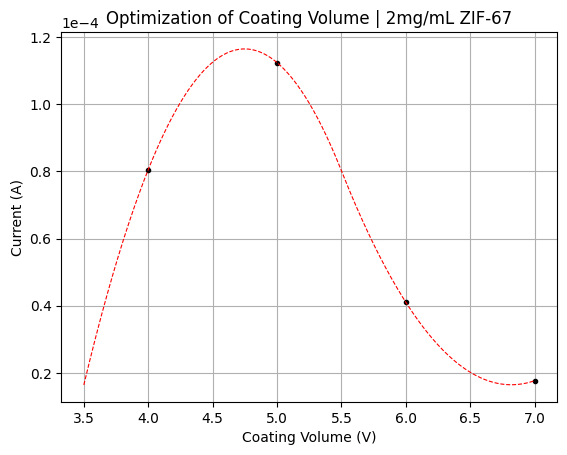

In [23]:
from scipy.interpolate import interp1d

fig2, ax2 = plt.subplots()
fig2.set_facecolor('white')
ax2.grid()
ax2.xaxis.label.set_text(r"Coating Volume (V)")
ax2.yaxis.label.set_text(r"Current (A)")
ax2.set_title("Optimization of Coating Volume | 2mg/mL ZIF-67")
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

dotPolyX = np.linspace(3.5, 7, 1000)
dataSave = dataPoint[:, 0, 2] - dataPoint[:, 1, 2]
ax2.plot([4, 5, 6, 7], dataSave, 'k.')
dotPolyF = interp1d([4, 5, 6, 7], dataSave, kind='quadratic', fill_value='extrapolate')
ax2.plot(dotPolyX, dotPolyF(dotPolyX), 'r--', linewidth=.8)

In [24]:
'''
deprecated!!
'''
'''
file="CV-excel.txt"
with open(file) as f:
    rawData = [strLines.split('\n')[0] for strLines in f.readlines()]
    # realData = rawData[rawData.index("Potential/V, Current/A") + 2 :]
    realData = np.array([[float(j) for j in i.split("\t")] for i in rawData])
    # selectData = realData[np.argwhere(realData == 0)[-1][0] : ].T # equal to x-y
    selectData = realData.T
    dataxy[0] = selectData[0]
    dataxy[1] = selectData[1]

li3.pop(0).remove()
li3 = ax1.plot(dataxy[0], dataxy[1], '-', label="3μL", linewidth=.4)

file="CV-{}uL.txt".format(int(4))
with open(file) as f:
    rawData = [strLines.split('\n')[0] for strLines in f.readlines()]
    realData = rawData[rawData.index("Potential/V, Current/A") + 2 :]
    realData = np.array([[float(j) for j in i.split(", ")] for i in realData])
    selectData = realData[np.argwhere(realData == 0)[-1][0] : ].T # equal to x-y
    dataxy[2] = selectData[0]
    dataxy[3] = selectData[1]

li4.pop(0).remove()
li4 = ax1.plot(dataxy[2], dataxy[3], '-', label="4μL", linewidth=.4)
ax1.legend(handles=[li3[0], li4[0], li5[0], li6[0], li7[0]])

fig1
'''

'\nfile="CV-excel.txt"\nwith open(file) as f:\n    rawData = [strLines.split(\'\n\')[0] for strLines in f.readlines()]\n    # realData = rawData[rawData.index("Potential/V, Current/A") + 2 :]\n    realData = np.array([[float(j) for j in i.split("\t")] for i in rawData])\n    # selectData = realData[np.argwhere(realData == 0)[-1][0] : ].T # equal to x-y\n    selectData = realData.T\n    dataxy[0] = selectData[0]\n    dataxy[1] = selectData[1]\n\nli3.pop(0).remove()\nli3 = ax1.plot(dataxy[0], dataxy[1], \'-\', label="3μL", linewidth=.4)\n\nfile="CV-{}uL.txt".format(int(4))\nwith open(file) as f:\n    rawData = [strLines.split(\'\n\')[0] for strLines in f.readlines()]\n    realData = rawData[rawData.index("Potential/V, Current/A") + 2 :]\n    realData = np.array([[float(j) for j in i.split(", ")] for i in realData])\n    selectData = realData[np.argwhere(realData == 0)[-1][0] : ].T # equal to x-y\n    dataxy[2] = selectData[0]\n    dataxy[3] = selectData[1]\n\nli4.pop(0).remove()\nli4 = a